# Journalistic Voice: exploring the differences between the writing styles of political editors for four UK news sites

## Project Proposal

### 1 Aims, objectives and background

1.1 Introduction

By far the most popular application of data science to the world of journalism is the use of machine learning to classify 'fake news' from 'real news'. However, there exists the potential to use a wider range of data science tools to extract interesting insight from news stories - insights which have previously been the realm of journalism experts writing analyses of texts.

This project was inspired by a recent paper by Koivunen et al. exploring affectivity in news journalism [1]. The authors used data science techniques to explore politeness (via hedging words) and affectivity in Finnish news articles around the topic of a political conflict between the Finnish government and trade unions. They had the resource of a linguist to classify affective/emotive words, however I believe a suitable proxy can be created.

I wanted to explore the ideas of using Natural Language Processing and data science techniques to create metrics to measure features which are often considered subjective, like affectivity, politeness and uniqueness of word choice - attempting to capture the 'voice' of a journalist.

I decided to focus on political journalism within the UK: specifically the work of political editors of popular news publications which publish articles online. To my knowledge no similar work has been done exploring the writing style of political editors in the UK using data science techniques.

1.2 Aims and objectives

Within this project, I would like to explore the following:

- Creating measures of voice: politeness analysis, affectivity analysis.
- Analyzing article content: topics discussed, politicians mentioned.
- Comparing these measures with historical gold price data: examining the relationship between news articles and gold prices.
- Look for relationships between our measures of politeness, affectivity and other features in order to tell a story about the voices of different editors - final visualisations and conclusions should be accessible to someone whose area is journalism studies rather than data science.
- As well as the bodies of articles, we can explore some of these questions for article titles.

For this project proposal, my aims are to:

- Decide how much data is required to sufficiently explore the above questions, taking into consideration constraints on time and resource.
- Decide which publications and articles should be used to allow for a coherent analysis.
- Collect the data via webscraping and store in a form which allows for data cleaning and analysis.
- Clean and transform the data such that it is suitable for use in the techniques I would like to utilize later.
- Carry out some exploratory data analysis to identify that there are trends within the data which make it viable for further exploration.

1.3 Data

1.3.1 Data requirements

Three news publications were chosen to represent different viewpoints and affiliations: "https://www.fxleaders.com/", "https://www.fxstreet.com/markets/commodities/metals/gold", "https://www.kitco.com/".

1.3.2 Historical gold price data

In addition to news articles, historical gold price data will be collected from a reliable source to be used for comparison with the measures of voice and content analysis of the news articles.


1.4 Methods

1.4.1 Data collection

The articles and gold price data will be collected via web scraping using Python libraries such as BeautifulSoup.

1.4.2 Data cleaning and transformation

The data will be cleaned and transformed as necessary for analysis, including:
- Removing any articles which are not relevant to gold prices or written by editors not included in the study
- Removing any extraneous information or formatting which may cause issues with analysis tools
- Lemmatizing the text and title of each article in order to better explore the content and theme of each piece
- Using sentiment analysis tools to calculate the positive, negative, and neutral sentiment of each article, as well as a compound sentiment score which takes into account the intensity of the sentiment
- Calculating politeness metrics such as the use of hedging words and modal verbs
- Calculating affectivity metrics such as the use of emotion words or sentiment scores
- Using TF-IDF to measure the uniqueness of word choice in each article.


1.4.3 Data analysis

Once the data has been cleaned and transformed, it will be analyzed using a variety of techniques in order to explore the aims and objectives outlined in section 1.2. These may include:

Topic modeling to identify the main themes and topics discussed in each editor's articles
Named entity recognition to identify which politicians are mentioned most frequently in each editor's articles
Comparing the politeness, affectivity, and uniqueness metrics across editors and publications
Comparing the sentiment scores and compound sentiment of each editor's articles to see if there are any trends or patterns
Using visualization techniques such as bar charts, line graphs, and scatter plots to communicate the results of the analysis
1.4.4 Data visualization and presentation
The results of the data analysis will be visualized and presented in a clear and accessible manner. This may include creating interactive graphs or dashboards using tools such as Plotly or Tableau. The final product should be easily understandable to those with a background in journalism studies, rather than just data science.

1.5 Future work

There are several potential avenues for future work based on the results of this project. Some ideas include:

Expanding the study to include more publications and editors, allowing for a more comprehensive analysis of the writing styles of political editors in the UK
Applying similar techniques to other topics or areas of journalism, such as business or sports reporting
Exploring the relationship between the writing styles of political editors and the performance of gold prices over time
Using more advanced machine learning techniques such as neural networks to identify patterns and trends in the data.

1.6 Ethical considerations

In order to ensure the ethical integrity of this project, the following precautions will be taken:

- All data will be collected from publicly available sources, and no personal information will be collected or analyzed.
- All data will be treated as anonymous, and no individual editor or publication will be directly named in the results
- The results of the analysis will not be used to make any judgments about the quality or credibility of the work of any specific editor or publication.

The study will adhere to the ethical guidelines outlined by the Association for Computational Linguistics (ACL) in their "Best Practices for Natural Language Processing in Social Science Research" document [2]

In [1]:
# Import libraries and modules
import pandas as pd
from bs4 import BeautifulSoup
import requests
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import re
from re import sub
import time
from nltk.stem import WordNetLemmatizer

# Show all matplotlib graphs inline
%matplotlib inline

# Set all graphs to a seaborn style with a grey background grid which makes reading graphs easier
sns.set()

2 Webscraping articles
2.1 Defining scraping and extraction functions
The list of URLs to be analysed during this project is in a CSV file. Prior to importing this file and scraping the content of the URLs, we need to define a function which we can call to scrape the data as we iterate through the URLs. Each website we are going to scrape from has different HTML, so we also need to write a different function to extract the required information from each.

Please note the webscraping takes 5-10 minutes because the Mirror's robots.txt specifies a crawl delay requirement of 10 seconds. Any faster and we'll be relegated to the website's ban list!

The below function checks if a webpage is accessible and returns the content if it is:

In [2]:
def getParsedWebpage(url, website):
    
    # Check that page is accessible for scraping
    
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36",
               "Upgrade-Insecure-Requests":"1", 
               "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", 
               "Accept-Encoding":"gzip, deflate, br", 
               "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
               "DNT":"1"}
    
    if website == 'mirror':
        time.sleep(12)
    
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        soup = 'error'
    else:
        content = response.content
        
        # Parse the webpage now we've checked it's accessible
        soup = BeautifulSoup(response.content, 'html.parser')
        
    return soup

Extracting information from dailyfx webpages
The following function extracts title, author and article text from a dailyfx webpage:

In [3]:
def extractInfoFxleaders(soup):
    
    # Extract article title
    title = soup.find(['h1'])
    
    # Extract article author
    author = soup.find('a', {'class': 'text-green hover'}).find("strong")
    
    # Extract article text
    article = soup.find('div', {'class': 'fxml-a-body-cntr'}).find_all("p")

    # Complile all article text into one string and ensure there is 1 space between each word
    article_text = ''
    for content in article:
        article_text = article_text + ' ' + content.get_text().lstrip().rstrip()

    # dailyfx quotation marks are formatted “ and ” rather than ", and not recognised as standard quotation marks
    # by python. Therefore we replace them at this stage.
    article_text = article_text.replace('“', '"')
    article_text = article_text.replace('”', '"') 
    
    #Same issue with ` and ’ rather than '
    article_text = article_text.replace('`', "'")
    article_text = article_text.replace('’', "'")
        
    return title.get_text(), author.get_text(), article_text[1:]

Extracting information from investing webpages
The following function extracts title, author and article text from a investing webpage:

In [4]:
def extractInfoFxstreet(soup):
    
    # Extract article title
    title = soup.find(['h1'])
    
    # Extract article author
    author = soup.find('a', {'data-gtmid': 'lateralnavigation-post-author'})
    
    # Extract article text
    article = soup.find('div', {'id': 'fxs_article_body'}).find_all("p")

    # Complile all article text into one string and ensure there is 1 space between each word
    article_text = ''
    for content in article:
        article_text = article_text + ' ' + content.get_text().lstrip().rstrip()

    # fxstreet quotation marks are formatted “ and ” rather than ", and not recognised as standard quotation marks
    # by python. Therefore we replace them at this stage.
    article_text = article_text.replace('“', '"')
    article_text = article_text.replace('”', '"') 
    
    #Same issue with ` and ’ rather than '
    article_text = article_text.replace('`', "'")
    article_text = article_text.replace('’', "'")
        
    return title.get_text(), author.get_text(), article_text[1:]

Extracting information from fxstreet webpages
The following function extracts title, author and article text from a fxstreet webpage:

In [5]:
def extractInfoKitco(soup):
    
    # Extract article title
    title = soup.find(['h1'])
    
    # Extract article author
    author = soup.find('div', {'class': 'author-description'}).find("a")
    
    # Extract article text
    article = soup.find('article', {'itemprop': 'articleBody'}).find_all("p")

    # Complile all article text into one string and ensure there is 1 space between each word
    article_text = ''
    for content in article:
        article_text = article_text + ' ' + content.get_text().lstrip().rstrip()

    # investing quotation marks are formatted “ and ” rather than ", and not recognised as standard quotation marks
    # by python. Therefore we replace them at this stage.
    article_text = article_text.replace('“', '"')
    article_text = article_text.replace('”', '"') 
    
    #Same issue with ` and ’ rather than '
    article_text = article_text.replace('`', "'")
    article_text = article_text.replace('’', "'")
        
    return title.get_text(), author.get_text(), article_text[1:]

2.2 Import URLs and scrape
2.2.1 Read in URLs and get website name
Now we have defined all the functions we are going to use, we read the CSV of URLs into a dataframe and the extract website name from the URL:

In [6]:
urls = pd.DataFrame()

urls["URL"] = [
    "https://www.fxleaders.com/news/2022/12/23/can-gold-keep-the-bullish-trend-after-falling-below-1800/",
    "https://www.fxleaders.com/news/2022/12/23/gold-halts-downtrend-upward-trendline-to-drive-buying-above-1790/",
    "https://www.fxleaders.com/news/2022/12/23/forex-signals-brief-for-december-23-canada-october-gdp-closing-a-crazy-year/",
    "https://www.fxleaders.com/news/2022/12/19/gold-crosses-over-1790-quick-daily-outlook/",
    "https://www.fxleaders.com/news/2022/12/18/bullish-sign-in-gold-as-it-bounces-while-mas-hold/",
    "https://www.fxleaders.com/news/2022/12/17/markets-worries-risks-shift-from-rate-hikes-to-global-recession/",
    "https://www.fxleaders.com/news/2022/12/16/is-the-retreat-in-gold-over/",
    "https://www.fxleaders.com/news/2022/12/15/gold-slips-to-1790-hawkish-fomc-and-fed-decision-in-play/",
    "https://www.fxleaders.com/news/2022/12/14/usd-to-dive-stocks-and-gold-to-rally-further-on-a-less-hawkish-fed/",
    "https://www.fxleaders.com/news/2022/12/13/gold-gains-support-near-1780-time-to-buy/",
    "https://www.fxleaders.com/news/2022/12/12/gold-slips-to-1787-as-fed-rate-hike-sentiment-dominates/",
    "https://www.fxleaders.com/news/2022/12/08/gold-bullish-bias-dominates-quick-daily-outlook/",
    "https://www.fxleaders.com/news/2022/12/06/commodities-pop-higher-for-a-moment-on-china-reopening-signals/",
    "https://www.fxleaders.com/news/2022/12/06/gold-gains-support-at-1765-brace-for-a-buying-position/",
    "https://www.fxleaders.com/news/2022/12/05/golds-bullish-bias-dominates-quick-update-on-a-buy-signal/",
    "https://www.fxleaders.com/news/2022/12/03/bullish-momentum-in-gold-continues-ending-the-week-close-to-1800/",
    "https://www.fxleaders.com/news/2022/12/02/gold-enters-oversold-zone-short-1800/",
    "https://www.fxstreet.com/news/gold-price-forecast-xau-usd-braces-for-us-pce-inflation-durable-goods-orders-below-1-800-202212230338",
    "https://www.fxstreet.com/news/gold-price-forecast-xau-usd-bears-lurk-behind-1-790-amid-holiday-season-confluence-detector-202212230652",
    "https://www.fxstreet.com/news/gold-price-forecast-xau-usd-braces-for-us-pce-inflation-durable-goods-orders-below-1-800-202212230338",
    "https://www.kitco.com/commentaries/2022-12-23/Gold-futures-remain-above-1800-as-spot-gold-still-attempts-to-breach-that-key-level.html",
    "https://www.kitco.com/commentaries/2022-12-23/Gold-Silver-2023-outrageous-precious-metals-predictions.html",
    "https://www.kitco.com/commentaries/2022-12-23/Where-are-the-stops-Friday-December-23-gold-and-silver.html"]

In [ ]:
# Create a new column in the dataframe to store the publication names
urls['Website'] = ''

# Iterate through each URL in the dataframe
for i in range(0, len(urls)):
    # Find the start and end indices of the publication name in the URL
    start_index = (urls.iloc[i].URL.find('www.')) + 4
    end_index = urls.iloc[i].URL.find('.co')

    # Extract the publication name and store it in the new 'Website' column
    urls['Website'][i] = urls.iloc[i].URL[start_index:end_index]
    

In [ ]:
urls

2.2.2 Scrape data and save to dataframe

Next we will attempt to scrape the articles at each of the URLs we have imported using the functions defined earlier. If successful, we will append to a dataframe of scraped information.


In [ ]:
scraped_data = pd.DataFrame(columns=['URL_ID', 'Publication', 'Author', 'Title', 'Text'])

for i in range(0, len(urls)):
    url = urls['URL'][i]
    
    # Check webpage is accessible and get parsed webpage, if not accessible soup will be returned as 'error'
    soup = getParsedWebpage(urls['URL'][i], urls['Website'][i])
    
    # If there was an error accessing the webpage, continue onto next iteration of loop
    if soup == 'error':
        print("Error fetching webpage, data not scraped:", url)
        continue
    
    publication = urls['Website'][i]
    
    # If url is from a publication we have planned to scrape, extract information using appropriate function
    if publication == 'fxleaders':
        title, author, article_text = extractInfoFxleaders(soup)
        pub_name = 'FxLeaders'
    elif publication == 'fxstreet':
        title, author, article_text = extractInfoFxstreet(soup)
        pub_name = 'FxStreet'
    elif publication == 'kitco':
        title, author, article_text = extractInfoKitco(soup)
        pub_name = 'Kitco'
    else:
        print("The following URL is from", publication, "which is not a website we have planned to scrape:", url)
        continue
    
    article_info = {'URL_ID': i, 'Publication': pub_name, 'Author': author, 'Title': title, 'Text': article_text}
    article_info_df = pd.DataFrame([article_info])
    scraped_data = pd.concat([scraped_data, article_info_df], ignore_index=True)

2.3 Check scraped data
We need to check that the data was scraped as intended, and that the data is not outside of expected bounds.

One of the checks we can carry out ensuring the number of words in the title and the article text falls into normal bounds. First we need to calculate the length of the title and text:

In [ ]:
# Calculate length (number of words) of each article title and text, add to dataframe

scraped_data['Text Length'] = 0
scraped_data['Title Length'] = 0

for i in range(0, len(scraped_data)):
    text_len = len(scraped_data['Text'][i].split(' '))
    title_len = len(scraped_data['Title'][i].split(' '))
    scraped_data.loc[i,['Text Length']] = text_len
    scraped_data.loc[i,['Title Length']] = title_len

In [ ]:
scraped_data.describe().round(1)

The below code will print a warning message if there are any issues with our data:

In [ ]:
# Checking scraped_data has the same number as rows as the number of URLs we intended for scraping
if len(urls) == len(scraped_data):
    print("All articles scraped and inserted into scraped_data.")
else:
    print(len(urls)-len(scraped_data), "articles were not scraped correctly and were not entered into scraped_data.")
    
# Checking there is no missing (null, NA, NaN) data in articles
total_missing = 0

for column in scraped_data:
    num_missing = scraped_data[column].isna().sum()
    total_missing =+ num_missing
    if num_missing > 0:
        print(column, "has", num_missing, "pieces of missing (null, NA, NaN) data.")

if total_missing == 0:
    print("There is no missing (null, NA, NaN) data in the scraped_data dataframe.")
else:
    print("There is a total of", total_missing, "pieces of missing (null, NA, NaN) data in the scraped_data dataframe.")
    
# Check there are 3 unique publications
    
if len(scraped_data['Publication'].unique()) != 3:
    print("There are", len(scraped_data['Publication'].unique()), "unique values in publication, but there should be 3.")
    
# Check title and text word count
if scraped_data['Text Length'].min() < 125:
    print("There is an article with less than 125 words - out of expected bounds. Check for incorrectly scraped data.")
    
if scraped_data['Text Length'].min() > 1200:
    print("There is an article with more than 1200 words - out of expected bounds. Check for incorrectly scraped data.")

if scraped_data['Title Length'].min() < 5:
    print("There is an article title with less than 5 words - out of expected bounds. Check for incorrectly scraped data.")
    
if scraped_data['Title Length'].min() > 25:
    print("There is an article title with more than 25 words - out of expected bounds. Check for incorrectly scraped data.")

In [ ]:
scraped_data

In [ ]:
# Review article text to ensure no obvious issues are visible
for i in range(0, len(scraped_data)):
    print(scraped_data['Text'][i])

2.4 Import previously scraped data
The risk of the news article data changing over the duration of the project is relatively low as articles are published with the intention that they are archived in the long term and the text not updated except in unavoidable circumstances (for example corrections). However, there is still the risk that article webpages may undergo the following changes:

Changes to HTML of the webpage
Corrections and amendments to the article text
Addition of text to state that an article is more than a year old (or other time period) and may contain out of date information, which may be inadvertently included in article text during scraping
In exceptional circumstances, deletion of controversial articles (for example, where the subject of an article has threatened or initiated legal action against the publisher)
To ensure consistency and replicable results, for the remainder of the project we will use previously scraped and saved article data.

In [ ]:
# Scraped data was previously saved to CSV 
scraped_data.to_csv('articles.csv')

In [ ]:
# Read previously scraped data
articles = pd.read_csv('articles.csv', index_col=0)

In [ ]:
# Previously scraped data should be the same as freshly scraped data
(scraped_data == articles).describe()

3 Data cleaning and processing

Different analysis techniques will need versions of the data with different types of processing:

Need full corpora, including stop words, for affectivity and politeness analysis. For example, some hedging words (which we will use to create a measure of politeness) can also be considered stop words.

Will need versions of the corpora without stop words, and versions which have been stemmed or lemmatized, for techniques exploring topics and key points of discussion.

Vectorisation: For some of the techniques in this project I will need to vectorise my data, for example using scikit-learn's CountVectorizer. I am as yet unsure of (a) what data I need to vectorise and (b) what the data structure I will need to store my vectorised data in to make it most easily accessible for the techniques.

Beyond the scope of EDA therefore not included

3.1 Editors dataframe
3.1.1 Create Editors dataframe
We create a dataframe with a row for each editor where we can store aggregated information about each editor's corpora. Initially it only contains editor name and publication, but more data will be appended later:

In [54]:
editor_names = articles['Author'].tolist()
publications = articles['Publication'].tolist()

editors = pd.DataFrame({'Editor': editor_names, 'Publication': publications})

In [44]:
articles

,URL_ID,Publication,Author,Title,Text,Text Length,Title Length
0,0,FxLeaders,Skerdian Meta,Can Gold Keep the Bullish Trend After Falling ...,"Gold has been acting as a risk asset lately, s...",224,10
1,1,FxLeaders,Skerdian Meta,Gold Halts Downtrend – Upward Trendline to Dri...,The price of gold has dropped to a key region ...,368,11
2,2,FxLeaders,Skerdian Meta,Forex Signals Brief for December 23: Canada Oc...,"Yesterday was supposed to be a quiet day, with...",636,13
3,3,FxLeaders,Skerdian Meta,"Gold Crosses Over $1,790 – Quick Daily Outlook","Gold prices continue to rise towards $1,800, w...",281,8
4,4,FxLeaders,Skerdian Meta,Bullish Sign in Gold As It Bounces While MAs Hold,Gold used to be very bearish from March this y...,289,10
5,5,FxLeaders,Skerdian Meta,Markets Worries/Risks Shift From Rate Hikes to...,This has been the most hawkish year for centra...,502,9
6,6,FxLeaders,Skerdian Meta,Is the Retreat in Gold Over?,Gold used to be bearish until the beginning of...,250,6
7,7,FxLeaders,Skerdian Meta,"Gold Slips to $1,790 – Hawkish FOMC and Fed De...","In the Asian session, gold prices fell precipi...",276,12
8,8,FxLeaders,Skerdian Meta,"USD to Dive, Stocks and Gold to Rally Further ...",The risk sentiment has improved considerably i...,230,14
9,9,FxLeaders,Aiswarya Gopan,"Gold Gains Support Near $1,780 – Time to Buy?","During early Tuesday morning in Europe, the go...",389,9


3.1.2 Compile corpora
For some later analysis we will do, it would be useful to have aggregated corpora for each editor. Here, we will consider article titles as part of an author's full corpus.

It might be useful to analyse article titles as a separate concept: within journalism, the title often holds special consideration. This is the first point of contact for readers - the title has to draw them in. We will create a corpus of titles for each author.

In [91]:
# Create a new column to store the full corpus and title corpus for each editor
editors['Full corpus'] = ''
editors['Title corpus'] = ''

# Iterate through each article, appending article title and text onto corresponding corpus
for i in range(0, len(articles)):
    editor = articles['Author'][i]
    publication = articles['Publication'][i]
    
    title = articles['Title'][i]
    text = articles['Text'][i]
    
    # Update the Full corpus and Title corpus columns for the current editor
    editors.at[i, ['Full corpus']] = ' ' + text
    editors.at[i, ['Title corpus']] = ' ' + title
editors

,Editor,Publication,Full corpus,Title corpus,Filtered corpus,Filtered title corpus,Lemmatized corpus,Lemmatized title corpus
0,Skerdian Meta,FxLeaders,"Gold has been acting as a risk asset lately, ...",Can Gold Keep the Bullish Trend After Falling...,gold keep bullish trend falling $ 1800 gold ac...,gold keep bullish trend falling $ 1800,gold keep bullish trend falling $ 1800 gold ac...,gold keep bullish trend falling $ 1800
1,Skerdian Meta,FxLeaders,The price of gold has dropped to a key region...,Gold Halts Downtrend – Upward Trendline to Dr...,gold halts downtrend upward trendline drive bu...,gold halts downtrend upward trendline drive bu...,gold halt downtrend upward trendline drive buy...,gold halt downtrend upward trendline drive buy...
2,Skerdian Meta,FxLeaders,"Yesterday was supposed to be a quiet day, wit...",Forex Signals Brief for December 23: Canada O...,forex signals brief december 23 canada october...,forex signals brief december 23 canada october...,forex signal brief december 23 canada october ...,forex signal brief december 23 canada october ...
3,Skerdian Meta,FxLeaders,"Gold prices continue to rise towards $1,800, ...","Gold Crosses Over $1,790 – Quick Daily Outlook",gold crosses $ 1790 quick daily outlook gold p...,gold crosses $ 1790 quick daily outlook,gold cross $ 1790 quick daily outlook gold pri...,gold cross $ 1790 quick daily outlook
4,Skerdian Meta,FxLeaders,Gold used to be very bearish from March this ...,Bullish Sign in Gold As It Bounces While MAs ...,bullish sign gold bounces mas hold gold used b...,bullish sign gold bounces mas hold,bullish sign gold bounce ma hold gold used bea...,bullish sign gold bounce ma hold
5,Skerdian Meta,FxLeaders,This has been the most hawkish year for centr...,Markets Worries/Risks Shift From Rate Hikes t...,markets worriesrisks shift rate hikes global r...,markets worriesrisks shift rate hikes global r...,market worriesrisks shift rate hike global rec...,market worriesrisks shift rate hike global rec...
6,Skerdian Meta,FxLeaders,Gold used to be bearish until the beginning o...,Is the Retreat in Gold Over?,retreat gold gold used bearish beginning novem...,retreat gold,retreat gold gold used bearish beginning novem...,retreat gold
7,Skerdian Meta,FxLeaders,"In the Asian session, gold prices fell precip...","Gold Slips to $1,790 – Hawkish FOMC and Fed D...",gold slips $ 1790 hawkish fomc fed decision pl...,gold slips $ 1790 hawkish fomc fed decision play,gold slip $ 1790 hawkish fomc fed decision pla...,gold slip $ 1790 hawkish fomc fed decision play
8,Skerdian Meta,FxLeaders,The risk sentiment has improved considerably ...,"USD to Dive, Stocks and Gold to Rally Further...",usd dive stocks gold rally less hawkish fed ri...,usd dive stocks gold rally less hawkish fed,usd dive stock gold rally le hawkish fed risk ...,usd dive stock gold rally le hawkish fed
9,Aiswarya Gopan,FxLeaders,"During early Tuesday morning in Europe, the g...","Gold Gains Support Near $1,780 – Time to Buy?",gold gains support near $ 1780 time buy early ...,gold gains support near $ 1780 time buy,gold gain support near $ 1780 time buy early t...,gold gain support near $ 1780 time buy


In [100]:
# We can now look at some summary statistics for each author
for i in range(0, len(editors)):
    msg = """{Publication} has a total corpus of {ctotal} words, which is an average of {caverage} words per article. 
Each title has an average of {taverage} words.""". format(
        Publication = editors['Publication'][i],
        ctotal = len(editors['Full corpus'][i].split(' ')),
        caverage = round(len(editors['Full corpus'][i].split(' '))),
        taverage = round(len(editors['Title corpus'][i].split(' '))))    
    
    
    print(msg)
    print()
    
    len(articles['Text'][i].split(' '))


FxLeaders has a total corpus of 225 words, which is an average of 225 words per article. 
Each title has an average of 11 words.

FxLeaders has a total corpus of 369 words, which is an average of 369 words per article. 
Each title has an average of 12 words.

FxLeaders has a total corpus of 637 words, which is an average of 637 words per article. 
Each title has an average of 14 words.

FxLeaders has a total corpus of 282 words, which is an average of 282 words per article. 
Each title has an average of 9 words.

FxLeaders has a total corpus of 290 words, which is an average of 290 words per article. 
Each title has an average of 11 words.

FxLeaders has a total corpus of 503 words, which is an average of 503 words per article. 
Each title has an average of 10 words.

FxLeaders has a total corpus of 251 words, which is an average of 251 words per article. 
Each title has an average of 7 words.

FxLeaders has a total corpus of 277 words, which is an average of 277 words per article. 
Ea

3.2 Removing stop words

We need to have versions of our corpora without stop words. Some analyses look at the frequency of words, and without removing stop words, some words (such as "the") will appear with high frequency despite not being meaningful for our analysis.

3.2.1 Identifying stop words not covered by NLTK's stop words

Stop words can be removed using nltk's stop words. However, there may be other words in the corpus which can be functionally considered stop words and which are of little use to us in comparative analysis. To spot some such words and remove them, we first analyse frequency of terms in each corpus, to see which are most common:

In [101]:
# First we define a function to get the word frquencies of each corpus
# At this stage we will also remove stop words as defined by nltk's stopwords set

nltk.download('stopwords')

def getFreqs(corpus):
  
    # Remove certain punctuation using regex. This will stop 'said' and 'said.' appearing as different words
    # Do not remove apostrophes
    corpus = re.sub('\.|\,|\"|\“|\”|\—|\–|\-|\?|\!|\:|\;|\(|\)', '', corpus)
    
    # Split the corpus into a list of words
    corpus_lst = corpus.lower().split()
  
    # Converting to a set means all duplicate words are removed
    unique_words_full = set(corpus_lst)
    
    # Remove stop words
    unique_words = [word for word in unique_words_full if not word in stopwords.words('english')]
    
    # The dataframe within which we will store our word-frequency pairs
    word_freqs = pd.DataFrame(columns=['Word', 'Frequency'])
      
     # Loop through unique words and add a row to the DataFrame for each word with its frequency
    for word in unique_words:
        word_freq_pair = {'Word': word, 'Frequency': corpus_lst.count(word)}
        word_freqs = pd.concat([word_freqs, pd.DataFrame(word_freq_pair, index=[0])], ignore_index=True)
        
    return word_freqs

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
# Generate word frequencies 
Fxleaders_freqs = getFreqs(editors['Full corpus'][0])
Fxstreet_word_freqs = getFreqs(editors['Full corpus'][1])
Kitco_freqs = getFreqs(editors['Full corpus'][2])



Let's have a look at many unique words each corpus has (with nltk stop words removed):

In [103]:
print('FxLeaders:', Fxleaders_freqs.index.max()+1)
print('FxStreet:', Fxstreet_word_freqs.index.max()+1)
print('Kitco:', Kitco_freqs.index.max()+1)

FxLeaders: 105
FxStreet: 160
Kitco: 217


In [104]:
# Get lists of 300 most frequent words in each corpus
fxleaders_top_words = list((Fxleaders_freqs.sort_values('Frequency', ascending=False).head(300))['Word'])
fxstreet_top_words = list((Fxstreet_word_freqs.sort_values('Frequency', ascending=False).head(300))['Word'])
kitco_top_words = list((Kitco_freqs.sort_values('Frequency', ascending=False).head(300))['Word'])

all_top_words = fxleaders_top_words + fxstreet_top_words + kitco_top_words

print(set(all_top_words))

{'certain', 'weeks', 'level', '$1820', 'continues', '2000', 'saw', 'stock', 'momentum', '2023', 'precious', 'point', 'signal', 'reverse', 'acting', 'revealed', 'sma', 'low', '014%', 'recent', 'time', 'remained', 'scenario', 'reversed', 'reading', '10375', 'already', 'hike', 'closed', 'thinks', 'seasonally', 'pce', 'asset', 'follow', 'considerably', 'returned', 'might', 'department', '214000', 'bias', 'decisive', 'earlier', 'massive', 'today', 'closing', 'h4', 'pairs', 'hand', 'particularly', 'break', 'crude', 'could', '225000', 'buyers', 'slow', 'deiced', 'kept', 'moment', 'durable', 'surge', 'since', 'lately', 'month', 'higher', 'high', 'gives', '$1775', 'currencies', 'key', 'turned', '100', 'rose', 'uk', "week's", 'slowed', 'cues', 'followed', 'japan', 'gold', '10450s', 'area', '3692%', 'reaffirming', 'obstacles', 'bitcoin', 'buck', 'borrowing', 'complete', 'turning', 'h1', '$200', 'upside', 'president', 'consistent', 'quick', 'central', 'interest', '6250', 'strong', 'remain', 'eur/g

There doesnt seem to be any words worth removing, thus wont be removing them from the corpora:

3.2.2 Create filtered corpora
Now we have decided on stop words, we can define our stopword removal function:

In [105]:
nltk.download('punkt')

def removeStopwords(corpus):
    corpus = corpus.lower()
    
    # Remove certain punctuation using regex. This will stop 'said' and 'said.' appearing as different words
    # Do not remove apostrophes
    corpus = re.sub('\.|\,|\"|\“|\”|\—|\–|\-|\?|\!|\:|\;|\/|\(|\)', '', corpus)
    
    # Tokenize the corpus - this creates a list of all the words in the corpus 
    tokens = word_tokenize(corpus)
    
    # As well as stopwords, we want to remove tokens with only punctuation, or suffixes separated from words
    punct = ["'", "''", '``', '(', ')', '%', '&', '...', '…', "‘", "’"]
    suffixes = ["'s", "n't", "'ve", "'ll", "'re", "'d"]
    remove_words = punct + suffixes + stopwords.words('english')
    
    # Create a new list with stop words removed from the corpus
    filtered_tokens = [word for word in tokens if not word in remove_words]
 
    # Reconstruct corpus as a string
    filtered_corpus = ' '.join(filtered_tokens)
    
    return filtered_corpus
    

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [106]:
# Filter the editors corpora and add as a new column
editors['Filtered corpus']=''
editors['Filtered title corpus']=''

for i in range(0, len(editors)):
    editors.loc[i, 'Filtered corpus'] = removeStopwords(editors['Full corpus'][i])
    editors.loc[i, 'Filtered title corpus'] = removeStopwords(editors['Title corpus'][i])

In [107]:
# Filter the articles corpora and add as a new column
articles['Filtered text']=''
articles['Filtered title']=''

for i in range(0, len(articles)):
    articles.loc[i, 'Filtered text'] = removeStopwords(articles['Text'][i])
    articles.loc[i, 'Filtered title'] = removeStopwords(articles['Title'][i])

3.3 Lemmatization
We can 'distill' the words we have into their roots to make them more meaningful for analysis. We can either use stemming or lemmatization. Stemming removes suffixes to create a root stem (so 'studies' would become 'stud'), while lemmatization will return a root word ('study').

In our later analysis, we want to be able to see whole, meaningful words and make impactful visualisations using them. Therefore in this case it is better to use lemmatization to get root words.

Because creating the root of words may sometimes give us unexpected results, we will create a separate column for lemmatized corpora. We'll want to use the filtered corpora with stop words removed, but without lemmatization, for some of our exploratory data analysis later.

Below we create an instance of the wordnet lemmatizer, create a lemmatizing function and apply to the filtered corpora:

In [108]:
import nltk
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

def lemmatizeCorpus(corpus):
    tokens = word_tokenize(corpus)
    
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(lemmatized_tokens)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\danson\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danson\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [109]:
# Lemmatize the editors corpora and add as a new column
editors['Lemmatized corpus']=''
editors['Lemmatized title corpus']=''

for i in range(0, len(editors)):
    editors.loc[i, 'Lemmatized corpus'] = lemmatizeCorpus(editors['Filtered corpus'][i])
    editors.loc[i, 'Lemmatized title corpus'] = lemmatizeCorpus(editors['Filtered title corpus'][i])

In [110]:
# Lemmatize the articles corpora and add as a new column
articles['Lemmatized text']=''
articles['Lemmatized title']=''

for i in range(0, len(articles)):
    articles.loc[i, 'Lemmatized text'] = lemmatizeCorpus(articles['Filtered text'][i])
    articles.loc[i, 'Lemmatized title'] = lemmatizeCorpus(articles['Filtered title'][i])

4 Generating features
4.1 Number of quotations
The number of quotes is a useful metric to calculate, and we can later explore the relationship between number of quotations in an article and other characteristics of articles. Additionally, calculate the number of quotes relative to length of each article as this is a more 'standardised' way to look at number of quotations.

In [111]:
articles['Quotes'] = 0
articles['Quotes per 1000 words'] = 0

for i in range(0, len(articles)):
    quotes = articles['Text'][i].count('"')
    articles.loc[i,['Quotes']] = quotes/2
    
    # Because dividing number of quotes by length of text would generate a small number, we instead calculate 
    # number of quotes (defined above as quotation marks divided by 2) per 1000 words
    articles.loc[i,['Quotes per 1000 words']] = (quotes/articles['Text Length'][i])*500

4.2 'Gold' density
In addition to quotation marks, the word 'gold' could be used as a proxy for quotations, including paraphrased quotations or those not included in quotation marks.

Let's count the number of times 'gold' is used in each article as density per 1000 words. We'll explore whether this feature correlates with any others in the exploratory data analysis.

In [112]:
# Count number of times 'said' is used per 1000 words
articles['Gold density per 1000 words'] = 0

for i in range(0, len(articles)):
    word_lst = articles['Text'][i].lower().split()
    articles.loc[i,['Gold density per 1000 words']] = (word_lst.count('gold')/articles['Text Length'][i])*1000

4.3 Sentiment analysis
I will be using nltk's sentiment analyser with the VADER lexicon to generate sentiment measurements. I have chosen to run the sentiment analyser on full, unfiltered corpora because using filtered corpora sometimes means losing information through loss of context, whereas there is relatively little cost to keeping stop words (etc).

Negative, neutral, and positive sentiments should add up to one (as they represent proportions). Compound sentiment is a normalised measurement with adjusted intensity, which outputs a value from 1 to -1 (positive to negative) [7].

In [113]:
# Download VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon, a sentiment analysis tool
nltk.download('vader_lexicon')

# Create an instance of the nltk sentiment analyser
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danson\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [114]:
# For each article, add the negative, neutral, positive and compound sentiment score as four new columns
articles['Neg_Sentiment'] = 0
articles['Neu_Sentiment'] = 0
articles['Pos_Sentiment'] = 0
articles['Comp_Sentiment'] = 0

for i in range(0, len(articles)):
    # Get sentiment score - sen_score has type dictionary
    sen_score = analyser.polarity_scores(articles['Text'][i])
    
    #Extract individual sentiment scores from the dictionary and enter them into the dataframe
    articles.loc[i,['Neg_Sentiment']] = sen_score['neg']
    articles.loc[i,['Neu_Sentiment']] = sen_score['neu']
    articles.loc[i,['Pos_Sentiment']] = sen_score['pos']
    articles.loc[i,['Comp_Sentiment']] = sen_score['compound']

5 Exploratory data analysis
5.1 Word count boxplot
Earlier we saw that the Kitco had the highest word count per article on average, the FxLeaders had the lowest. Let's create a box plot to explore the distribution of word counts across each publication:

In [115]:
# Create a colour palette for graphs where we want to differenciate the four different publications

pub_palette = sns.blend_palette(['crimson', 'blue', 'goldenrod', 'darkcyan'], 4)

pub_palette

[(0.8627450980392157, 0.0784313725490196, 0.23529411764705882),
 (0.0, 0.0, 1.0),
 (0.8549019607843137, 0.6470588235294118, 0.12549019607843137),
 (0.0, 0.5450980392156862, 0.5450980392156862)]

[Text(0.5, 0, '')]

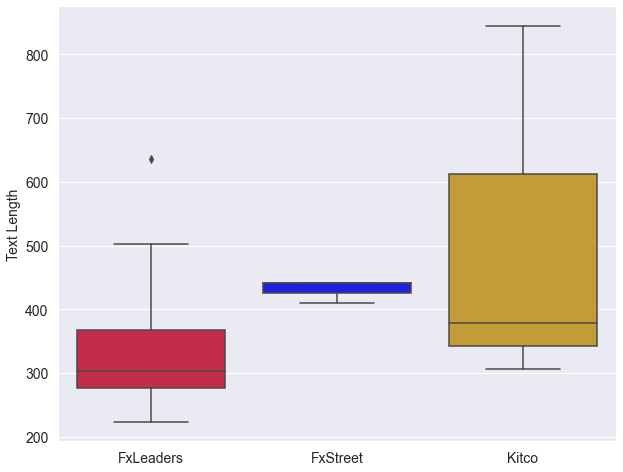

In [116]:
plt.gcf().set_size_inches(10, 8)

ax = sns.boxplot(x='Publication', y='Text Length', data=articles, palette=pub_palette)

ax.set(xlabel=None)

Kitco has the highest amount of wordcount per article while fx street has the least

5.3 Sentiment boxplots
Let's look at how sentiment varies across publications.

It makes sense to look at negative, neutral, and positive sentiments together as they are interrelated and should add up to one. Compound sentiment has a different scale (1 to -1, positive to negative), so we should look at this separately.

We can explore sentiment through boxplots, however creating one boxplot to display negative, neutral and positive sentiments for each publication isn't very easy to do from our articles dataframe as it currently stands. Let's use the pandas melt function to create a new dataframe of 'unpivoted' sentiment scores.

In [117]:
sentiments = pd.melt(articles, id_vars =['Publication'], 
                     value_vars =['Neg_Sentiment', 'Neu_Sentiment', 'Pos_Sentiment'])

sentiments

,Publication,variable,value
0,FxLeaders,Neg_Sentiment,0.037
1,FxLeaders,Neg_Sentiment,0.047
2,FxLeaders,Neg_Sentiment,0.071
3,FxLeaders,Neg_Sentiment,0.122
4,FxLeaders,Neg_Sentiment,0.042
...,...,...,...
64,FxStreet,Pos_Sentiment,0.071
65,FxStreet,Pos_Sentiment,0.097
66,Kitco,Pos_Sentiment,0.234
67,Kitco,Pos_Sentiment,0.109


[Text(0.5, 1.0, 'Unfiltered article text sentiments'),
 Text(0.5, 0, ''),
 Text(0, 0.5, 'Score')]

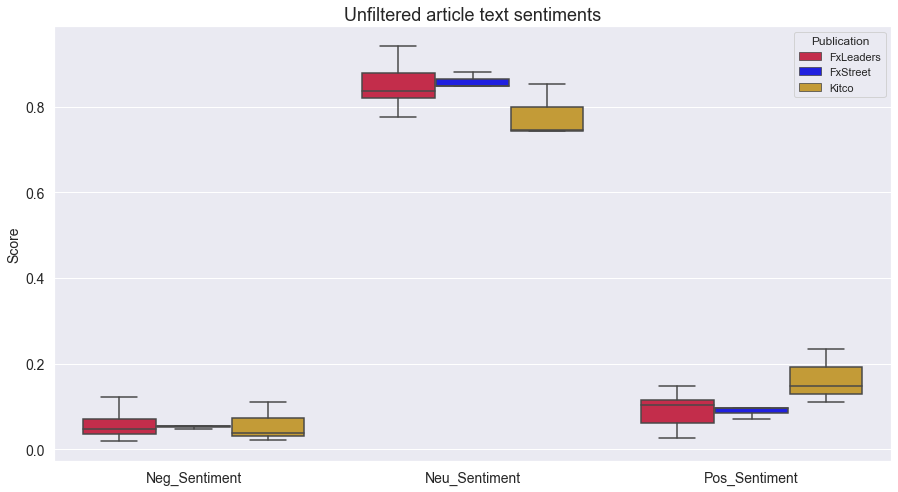

In [118]:
# Create boxplot for negative, neutral and positive sentiment scores

plt.gcf().set_size_inches(15, 8)

ax = sns.boxplot(x='variable', y='value', data=sentiments, hue='Publication',
                 palette=pub_palette)

ax.set(title='Unfiltered article text sentiments', xlabel=None, ylabel='Score')

Here we can see that there is actually quite a big difference. Fx street has a lot of positive sentiment while almost 0 negative sentiment, while fx leaders and kitco remain rather neutral. Let's see if the compound sentiment will give us some more useful information to differentiate typical sentiment between publications:

[Text(0.5, 0, '')]

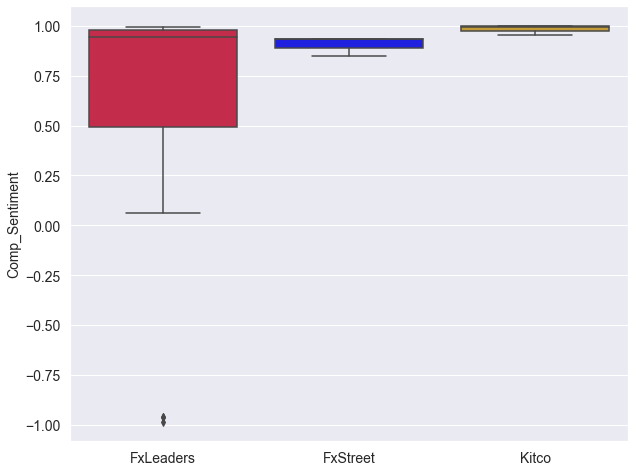

In [119]:
plt.gcf().set_size_inches(10, 8)

ax = sns.boxplot(x='Publication', y='Comp_Sentiment', data=articles, palette=pub_palette)

ax.set(xlabel=None)

Here we can see that FxLeaders is rather neutral while FXstreet and Kitco have negative sentiments. Some say the VADER lexicon is best used on smaller texts of less than 300 words [7] (for example tweets would be a great use case). It would be worth exploring alternatives for sentiment analysis more suitable for longer form text.

5.4 Word count and quotation density correlation
We can look at the relationship between article features to ask questions such as 'do editors use more quotes (per word) in longer articles?'

Below is a scatter plot with a line of best fit for each publication exploring this question:

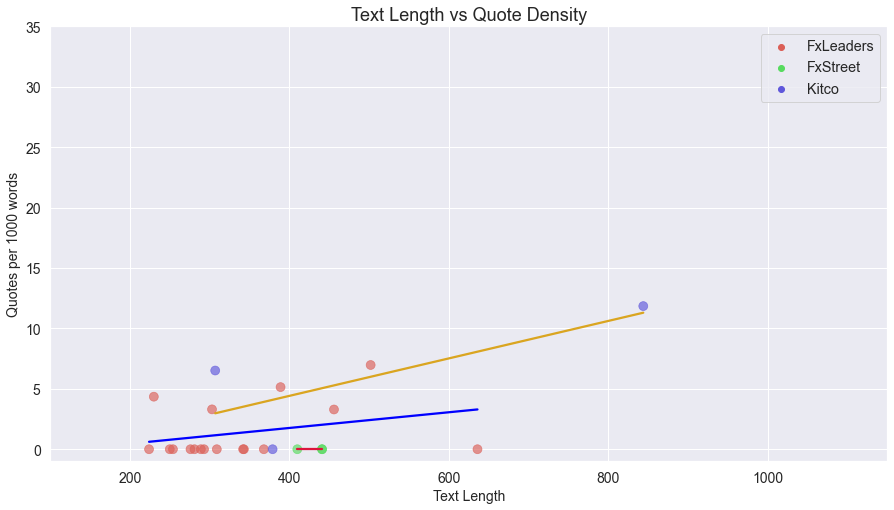

In [120]:
plt.gcf().set_size_inches(15, 8)

# Plot a regplot (regression plot) as a 'line of best fit' for each publication on top of a scatter plot

ax = sns.regplot(x='Text Length', y='Quotes per 1000 words', data=articles[articles['Publication']=='FxStreet'], 
                 scatter=False, ci=None,
                line_kws={'color':'crimson'})

ax = sns.regplot(x='Text Length', y='Quotes per 1000 words', data=articles[articles['Publication']=='FxLeaders'], 
                 scatter=False, ci=None,
                line_kws={'color':'blue'})

ax = sns.regplot(x='Text Length', y='Quotes per 1000 words', data=articles[articles['Publication']=='Kitco'], 
                 scatter=False, ci=None,
                line_kws={'color':'goldenrod'})

ax = sns.scatterplot(x='Text Length', y='Quotes per 1000 words', hue=articles['Publication'].astype('category'), 
                     alpha=0.65, s=80, palette="hls", edgecolor=None, data=articles)


ax.set(title='Text Length vs Quote Density')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.legend(fontsize='large')
plt.xlim(100, 1150)
plt.ylim(-1, 35)

plt.show()

Both negative and positive correlations exist - with The FxLeaders's editor being alone in utilising less quotes on longer articles than shorter articles.

5.5 PairGrid
The above is a detailed look at the relationship between two features, however looking at each set of two features individually to see if there is an interesting relationship is not always the best approach.

Instead, one way we can spot the strongest relationships between features is by using a PairGrid.

The PairGrid below plots some of the features we have already looked at against each other in both scatterplot and regplot ('line of best fit') form. On the diagonal we have a KDE plot, which can be described as a 'smoothed out histogram', which lets us look at how the distribution of each variable varies by publication.

E:\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


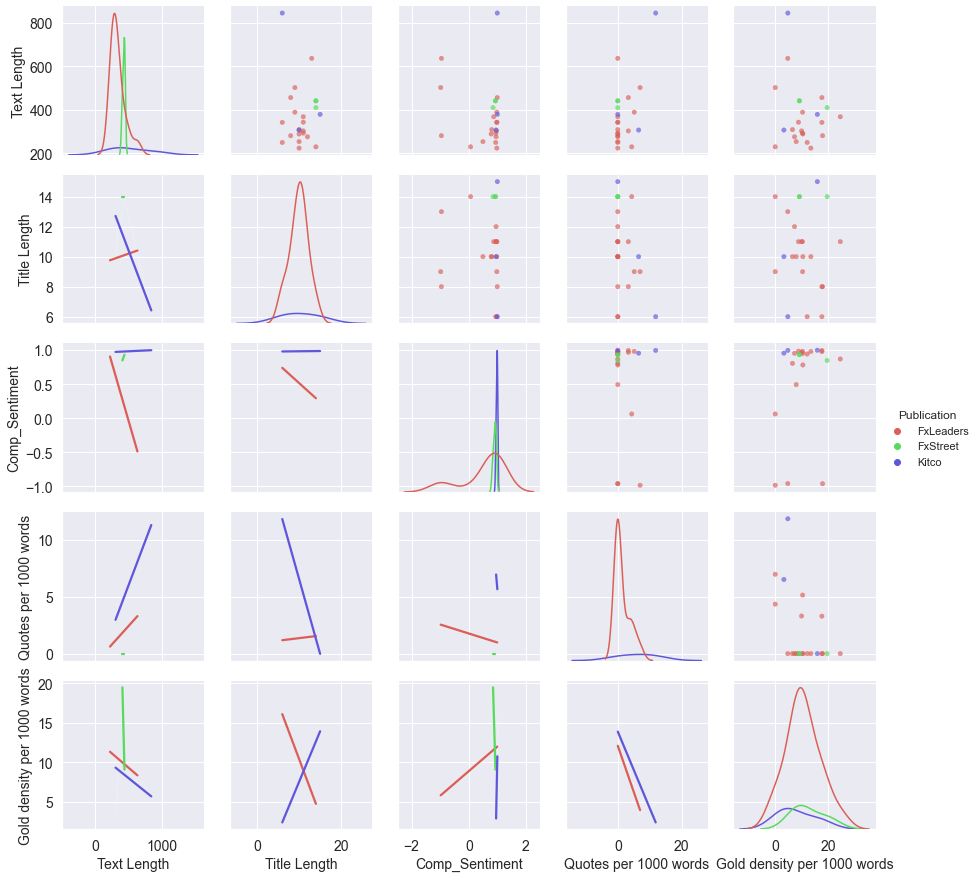

In [121]:
pg = sns.PairGrid(articles, hue='Publication', palette="hls", diag_sharey=False,
                  vars=['Text Length', 'Title Length', 'Comp_Sentiment', 'Quotes per 1000 words', 'Gold density per 1000 words'])

pg.map_diag(sns.kdeplot)
pg.map_lower(sns.regplot, ci=False, scatter=False)
pg.map_upper(sns.scatterplot, alpha=0.65, s=20, edgecolor=None)
pg.add_legend()

We can see some interesting trends emerging which we can explore further in the second part of the project:

Gold density and number of quotes per 1000 words seem strongly correlated on their regplot. However, when looking at the correlation of these counts with other variables (text and title length, sentiment), they often have different relationships with the variables.
Most of the time publications have their own trends with very different gradients to one another, rather than collective trends. We should continue taking each publication into account individually when looking at relationships in order to extract insightful information.
The KDE plot for composite sentiment shows all the publications have a similar distribution. The scatterplots demonstrate that composite sentiment tends to be either very positive or very negative, with few values in between, indicating perhaps the sentiment analysis method we have used is not the most suitable for long form text.

6.

Machine learning

Lastly, I will be creating a machine learning model that reads historical XAUUSD data and predicts to see the correlation between the above data science analysis and how the trading market actually functions.

In [127]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the XAUUSD data
df = pd.read_csv("XAUUSD_historical_data_30min.csv")

# Sort the data by the "Date" column in ascending order
df = df.sort_values("Date")

# Pre-process the data
scaler = StandardScaler()
X = df[["Open", "High", "Low", "Close"]].values
X = scaler.fit_transform(X)
y = df["Close"].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



I will be reading data from a csv downloaded online that recorded historical data for XAUUSD. This has the past 1000 datapoints to ensure accuracy and better predictions. Using the data, I will create a model where you can repeatedly train it to ensure that it is more accurate. Further testing is definitely required but for sake of this exploratory project, we will be using this to do our comaprison.

After saving the model, the next file will be reading through the created model and the previous csv file to make comparisons and do predictions.

In [129]:
# Convert the data to tensors
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float().view(-1, 1)
y_test = torch.tensor(y_test).float().view(-1, 1)

# Define the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

model = Net()

# Choose an optimizer and a loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

# Train the model
for epoch in range(4000):
    # Forward pass
    y_pred = model(X_train)
    
    # Compute the loss
    loss = loss_fn(y_pred, y_train)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backward pass
    loss.backward()
    
    # Update the weights
    optimizer.step()
    
    # Print the loss
    print(f"Epoch: {epoch+1}/50, Loss: {loss:.4f}")

# Evaluate the model on the test set
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = loss_fn(y_pred, y_test).item()
    print(f"Test loss: {test_loss:.4f}")

# Save the model
torch.save(model.state_dict(), "XAUUSD_model_30min.pt")


C:\Users\danson\AppData\Local\Temp\ipykernel_28424\786871437.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train).float()
C:\Users\danson\AppData\Local\Temp\ipykernel_28424\786871437.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test).float()
C:\Users\danson\AppData\Local\Temp\ipykernel_28424\786871437.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train).float().view(-1, 1)
C:\Users\danson\AppData\Local\Temp\ipykernel_28424\786871437.py:5: UserWarn

Epoch: 1/50, Loss: 46216.3438
Epoch: 2/50, Loss: 46135.7500
Epoch: 3/50, Loss: 46054.5117
Epoch: 4/50, Loss: 45972.1719
Epoch: 5/50, Loss: 45888.2617
Epoch: 6/50, Loss: 45802.2891
Epoch: 7/50, Loss: 45713.8477
Epoch: 8/50, Loss: 45622.5742
Epoch: 9/50, Loss: 45528.1289
Epoch: 10/50, Loss: 45430.1914
Epoch: 11/50, Loss: 45328.4453
Epoch: 12/50, Loss: 45222.5859
Epoch: 13/50, Loss: 45112.3242
Epoch: 14/50, Loss: 44997.3945
Epoch: 15/50, Loss: 44877.5352
Epoch: 16/50, Loss: 44752.4961
Epoch: 17/50, Loss: 44622.0469
Epoch: 18/50, Loss: 44485.9531
Epoch: 19/50, Loss: 44343.9805
Epoch: 20/50, Loss: 44195.9219
Epoch: 21/50, Loss: 44041.5469
Epoch: 22/50, Loss: 43880.6562
Epoch: 23/50, Loss: 43713.0430
Epoch: 24/50, Loss: 43538.4883
Epoch: 25/50, Loss: 43356.7969
Epoch: 26/50, Loss: 43167.7695
Epoch: 27/50, Loss: 42971.2031
Epoch: 28/50, Loss: 42766.9297
Epoch: 29/50, Loss: 42554.7422
Epoch: 30/50, Loss: 42334.4688
Epoch: 31/50, Loss: 42105.9258
Epoch: 32/50, Loss: 41868.9648
Epoch: 33/50, Los

Epoch: 365/50, Loss: 4.4239
Epoch: 366/50, Loss: 4.4206
Epoch: 367/50, Loss: 4.4174
Epoch: 368/50, Loss: 4.4142
Epoch: 369/50, Loss: 4.4110
Epoch: 370/50, Loss: 4.4079
Epoch: 371/50, Loss: 4.4047
Epoch: 372/50, Loss: 4.4016
Epoch: 373/50, Loss: 4.3985
Epoch: 374/50, Loss: 4.3954
Epoch: 375/50, Loss: 4.3923
Epoch: 376/50, Loss: 4.3892
Epoch: 377/50, Loss: 4.3861
Epoch: 378/50, Loss: 4.3830
Epoch: 379/50, Loss: 4.3800
Epoch: 380/50, Loss: 4.3770
Epoch: 381/50, Loss: 4.3739
Epoch: 382/50, Loss: 4.3709
Epoch: 383/50, Loss: 4.3679
Epoch: 384/50, Loss: 4.3650
Epoch: 385/50, Loss: 4.3620
Epoch: 386/50, Loss: 4.3591
Epoch: 387/50, Loss: 4.3563
Epoch: 388/50, Loss: 4.3536
Epoch: 389/50, Loss: 4.3510
Epoch: 390/50, Loss: 4.3486
Epoch: 391/50, Loss: 4.3462
Epoch: 392/50, Loss: 4.3437
Epoch: 393/50, Loss: 4.3406
Epoch: 394/50, Loss: 4.3368
Epoch: 395/50, Loss: 4.3327
Epoch: 396/50, Loss: 4.3292
Epoch: 397/50, Loss: 4.3264
Epoch: 398/50, Loss: 4.3240
Epoch: 399/50, Loss: 4.3215
Epoch: 400/50, Loss:

Epoch: 716/50, Loss: 3.3570
Epoch: 717/50, Loss: 3.3539
Epoch: 718/50, Loss: 3.3507
Epoch: 719/50, Loss: 3.3476
Epoch: 720/50, Loss: 3.3444
Epoch: 721/50, Loss: 3.3413
Epoch: 722/50, Loss: 3.3381
Epoch: 723/50, Loss: 3.3349
Epoch: 724/50, Loss: 3.3318
Epoch: 725/50, Loss: 3.3286
Epoch: 726/50, Loss: 3.3255
Epoch: 727/50, Loss: 3.3223
Epoch: 728/50, Loss: 3.3192
Epoch: 729/50, Loss: 3.3160
Epoch: 730/50, Loss: 3.3128
Epoch: 731/50, Loss: 3.3097
Epoch: 732/50, Loss: 3.3065
Epoch: 733/50, Loss: 3.3034
Epoch: 734/50, Loss: 3.3002
Epoch: 735/50, Loss: 3.2970
Epoch: 736/50, Loss: 3.2939
Epoch: 737/50, Loss: 3.2907
Epoch: 738/50, Loss: 3.2876
Epoch: 739/50, Loss: 3.2844
Epoch: 740/50, Loss: 3.2813
Epoch: 741/50, Loss: 3.2781
Epoch: 742/50, Loss: 3.2749
Epoch: 743/50, Loss: 3.2718
Epoch: 744/50, Loss: 3.2686
Epoch: 745/50, Loss: 3.2655
Epoch: 746/50, Loss: 3.2623
Epoch: 747/50, Loss: 3.2591
Epoch: 748/50, Loss: 3.2560
Epoch: 749/50, Loss: 3.2528
Epoch: 750/50, Loss: 3.2497
Epoch: 751/50, Loss:

Epoch: 1050/50, Loss: 2.3312
Epoch: 1051/50, Loss: 2.3287
Epoch: 1052/50, Loss: 2.3238
Epoch: 1053/50, Loss: 2.3190
Epoch: 1054/50, Loss: 2.3162
Epoch: 1055/50, Loss: 2.3148
Epoch: 1056/50, Loss: 2.3124
Epoch: 1057/50, Loss: 2.3084
Epoch: 1058/50, Loss: 2.3043
Epoch: 1059/50, Loss: 2.3016
Epoch: 1060/50, Loss: 2.2995
Epoch: 1061/50, Loss: 2.2969
Epoch: 1062/50, Loss: 2.2933
Epoch: 1063/50, Loss: 2.2897
Epoch: 1064/50, Loss: 2.2870
Epoch: 1065/50, Loss: 2.2847
Epoch: 1066/50, Loss: 2.2818
Epoch: 1067/50, Loss: 2.2784
Epoch: 1068/50, Loss: 2.2752
Epoch: 1069/50, Loss: 2.2725
Epoch: 1070/50, Loss: 2.2699
Epoch: 1071/50, Loss: 2.2670
Epoch: 1072/50, Loss: 2.2638
Epoch: 1073/50, Loss: 2.2607
Epoch: 1074/50, Loss: 2.2580
Epoch: 1075/50, Loss: 2.2553
Epoch: 1076/50, Loss: 2.2523
Epoch: 1077/50, Loss: 2.2493
Epoch: 1078/50, Loss: 2.2463
Epoch: 1079/50, Loss: 2.2436
Epoch: 1080/50, Loss: 2.2408
Epoch: 1081/50, Loss: 2.2378
Epoch: 1082/50, Loss: 2.2348
Epoch: 1083/50, Loss: 2.2320
Epoch: 1084/50

Epoch: 1430/50, Loss: 1.3426
Epoch: 1431/50, Loss: 1.3404
Epoch: 1432/50, Loss: 1.3382
Epoch: 1433/50, Loss: 1.3360
Epoch: 1434/50, Loss: 1.3338
Epoch: 1435/50, Loss: 1.3316
Epoch: 1436/50, Loss: 1.3294
Epoch: 1437/50, Loss: 1.3272
Epoch: 1438/50, Loss: 1.3250
Epoch: 1439/50, Loss: 1.3228
Epoch: 1440/50, Loss: 1.3206
Epoch: 1441/50, Loss: 1.3184
Epoch: 1442/50, Loss: 1.3162
Epoch: 1443/50, Loss: 1.3140
Epoch: 1444/50, Loss: 1.3118
Epoch: 1445/50, Loss: 1.3096
Epoch: 1446/50, Loss: 1.3074
Epoch: 1447/50, Loss: 1.3053
Epoch: 1448/50, Loss: 1.3031
Epoch: 1449/50, Loss: 1.3009
Epoch: 1450/50, Loss: 1.2987
Epoch: 1451/50, Loss: 1.2966
Epoch: 1452/50, Loss: 1.2944
Epoch: 1453/50, Loss: 1.2922
Epoch: 1454/50, Loss: 1.2901
Epoch: 1455/50, Loss: 1.2879
Epoch: 1456/50, Loss: 1.2858
Epoch: 1457/50, Loss: 1.2836
Epoch: 1458/50, Loss: 1.2814
Epoch: 1459/50, Loss: 1.2793
Epoch: 1460/50, Loss: 1.2771
Epoch: 1461/50, Loss: 1.2750
Epoch: 1462/50, Loss: 1.2728
Epoch: 1463/50, Loss: 1.2707
Epoch: 1464/50

Epoch: 1823/50, Loss: 0.6428
Epoch: 1824/50, Loss: 0.6414
Epoch: 1825/50, Loss: 0.6401
Epoch: 1826/50, Loss: 0.6387
Epoch: 1827/50, Loss: 0.6374
Epoch: 1828/50, Loss: 0.6360
Epoch: 1829/50, Loss: 0.6347
Epoch: 1830/50, Loss: 0.6333
Epoch: 1831/50, Loss: 0.6320
Epoch: 1832/50, Loss: 0.6306
Epoch: 1833/50, Loss: 0.6293
Epoch: 1834/50, Loss: 0.6280
Epoch: 1835/50, Loss: 0.6266
Epoch: 1836/50, Loss: 0.6253
Epoch: 1837/50, Loss: 0.6240
Epoch: 1838/50, Loss: 0.6227
Epoch: 1839/50, Loss: 0.6213
Epoch: 1840/50, Loss: 0.6200
Epoch: 1841/50, Loss: 0.6187
Epoch: 1842/50, Loss: 0.6174
Epoch: 1843/50, Loss: 0.6160
Epoch: 1844/50, Loss: 0.6147
Epoch: 1845/50, Loss: 0.6134
Epoch: 1846/50, Loss: 0.6121
Epoch: 1847/50, Loss: 0.6108
Epoch: 1848/50, Loss: 0.6095
Epoch: 1849/50, Loss: 0.6082
Epoch: 1850/50, Loss: 0.6069
Epoch: 1851/50, Loss: 0.6056
Epoch: 1852/50, Loss: 0.6043
Epoch: 1853/50, Loss: 0.6030
Epoch: 1854/50, Loss: 0.6017
Epoch: 1855/50, Loss: 0.6004
Epoch: 1856/50, Loss: 0.5991
Epoch: 1857/50

Epoch: 2208/50, Loss: 0.2647
Epoch: 2209/50, Loss: 0.2610
Epoch: 2210/50, Loss: 0.2572
Epoch: 2211/50, Loss: 0.2563
Epoch: 2212/50, Loss: 0.2576
Epoch: 2213/50, Loss: 0.2585
Epoch: 2214/50, Loss: 0.2570
Epoch: 2215/50, Loss: 0.2543
Epoch: 2216/50, Loss: 0.2526
Epoch: 2217/50, Loss: 0.2528
Epoch: 2218/50, Loss: 0.2533
Epoch: 2219/50, Loss: 0.2526
Epoch: 2220/50, Loss: 0.2509
Epoch: 2221/50, Loss: 0.2494
Epoch: 2222/50, Loss: 0.2489
Epoch: 2223/50, Loss: 0.2490
Epoch: 2224/50, Loss: 0.2486
Epoch: 2225/50, Loss: 0.2474
Epoch: 2226/50, Loss: 0.2461
Epoch: 2227/50, Loss: 0.2454
Epoch: 2228/50, Loss: 0.2452
Epoch: 2229/50, Loss: 0.2448
Epoch: 2230/50, Loss: 0.2439
Epoch: 2231/50, Loss: 0.2429
Epoch: 2232/50, Loss: 0.2421
Epoch: 2233/50, Loss: 0.2417
Epoch: 2234/50, Loss: 0.2412
Epoch: 2235/50, Loss: 0.2405
Epoch: 2236/50, Loss: 0.2397
Epoch: 2237/50, Loss: 0.2389
Epoch: 2238/50, Loss: 0.2383
Epoch: 2239/50, Loss: 0.2378
Epoch: 2240/50, Loss: 0.2372
Epoch: 2241/50, Loss: 0.2365
Epoch: 2242/50

Epoch: 2521/50, Loss: 0.1048
Epoch: 2522/50, Loss: 0.1045
Epoch: 2523/50, Loss: 0.1041
Epoch: 2524/50, Loss: 0.1038
Epoch: 2525/50, Loss: 0.1035
Epoch: 2526/50, Loss: 0.1032
Epoch: 2527/50, Loss: 0.1028
Epoch: 2528/50, Loss: 0.1025
Epoch: 2529/50, Loss: 0.1022
Epoch: 2530/50, Loss: 0.1019
Epoch: 2531/50, Loss: 0.1015
Epoch: 2532/50, Loss: 0.1012
Epoch: 2533/50, Loss: 0.1009
Epoch: 2534/50, Loss: 0.1006
Epoch: 2535/50, Loss: 0.1003
Epoch: 2536/50, Loss: 0.1000
Epoch: 2537/50, Loss: 0.0996
Epoch: 2538/50, Loss: 0.0993
Epoch: 2539/50, Loss: 0.0990
Epoch: 2540/50, Loss: 0.0987
Epoch: 2541/50, Loss: 0.0984
Epoch: 2542/50, Loss: 0.0981
Epoch: 2543/50, Loss: 0.0978
Epoch: 2544/50, Loss: 0.0975
Epoch: 2545/50, Loss: 0.0972
Epoch: 2546/50, Loss: 0.0968
Epoch: 2547/50, Loss: 0.0965
Epoch: 2548/50, Loss: 0.0962
Epoch: 2549/50, Loss: 0.0959
Epoch: 2550/50, Loss: 0.0956
Epoch: 2551/50, Loss: 0.0953
Epoch: 2552/50, Loss: 0.0950
Epoch: 2553/50, Loss: 0.0947
Epoch: 2554/50, Loss: 0.0944
Epoch: 2555/50

Epoch: 2911/50, Loss: 0.0271
Epoch: 2912/50, Loss: 0.0270
Epoch: 2913/50, Loss: 0.0269
Epoch: 2914/50, Loss: 0.0268
Epoch: 2915/50, Loss: 0.0267
Epoch: 2916/50, Loss: 0.0266
Epoch: 2917/50, Loss: 0.0265
Epoch: 2918/50, Loss: 0.0264
Epoch: 2919/50, Loss: 0.0263
Epoch: 2920/50, Loss: 0.0262
Epoch: 2921/50, Loss: 0.0261
Epoch: 2922/50, Loss: 0.0260
Epoch: 2923/50, Loss: 0.0259
Epoch: 2924/50, Loss: 0.0258
Epoch: 2925/50, Loss: 0.0257
Epoch: 2926/50, Loss: 0.0256
Epoch: 2927/50, Loss: 0.0255
Epoch: 2928/50, Loss: 0.0254
Epoch: 2929/50, Loss: 0.0253
Epoch: 2930/50, Loss: 0.0252
Epoch: 2931/50, Loss: 0.0251
Epoch: 2932/50, Loss: 0.0250
Epoch: 2933/50, Loss: 0.0249
Epoch: 2934/50, Loss: 0.0248
Epoch: 2935/50, Loss: 0.0247
Epoch: 2936/50, Loss: 0.0246
Epoch: 2937/50, Loss: 0.0245
Epoch: 2938/50, Loss: 0.0244
Epoch: 2939/50, Loss: 0.0243
Epoch: 2940/50, Loss: 0.0243
Epoch: 2941/50, Loss: 0.0242
Epoch: 2942/50, Loss: 0.0242
Epoch: 2943/50, Loss: 0.0242
Epoch: 2944/50, Loss: 0.0243
Epoch: 2945/50

Epoch: 3303/50, Loss: 0.0052
Epoch: 3304/50, Loss: 0.0052
Epoch: 3305/50, Loss: 0.0052
Epoch: 3306/50, Loss: 0.0051
Epoch: 3307/50, Loss: 0.0051
Epoch: 3308/50, Loss: 0.0051
Epoch: 3309/50, Loss: 0.0051
Epoch: 3310/50, Loss: 0.0051
Epoch: 3311/50, Loss: 0.0050
Epoch: 3312/50, Loss: 0.0050
Epoch: 3313/50, Loss: 0.0050
Epoch: 3314/50, Loss: 0.0050
Epoch: 3315/50, Loss: 0.0049
Epoch: 3316/50, Loss: 0.0049
Epoch: 3317/50, Loss: 0.0049
Epoch: 3318/50, Loss: 0.0049
Epoch: 3319/50, Loss: 0.0049
Epoch: 3320/50, Loss: 0.0048
Epoch: 3321/50, Loss: 0.0048
Epoch: 3322/50, Loss: 0.0048
Epoch: 3323/50, Loss: 0.0048
Epoch: 3324/50, Loss: 0.0047
Epoch: 3325/50, Loss: 0.0047
Epoch: 3326/50, Loss: 0.0047
Epoch: 3327/50, Loss: 0.0047
Epoch: 3328/50, Loss: 0.0047
Epoch: 3329/50, Loss: 0.0046
Epoch: 3330/50, Loss: 0.0046
Epoch: 3331/50, Loss: 0.0046
Epoch: 3332/50, Loss: 0.0046
Epoch: 3333/50, Loss: 0.0045
Epoch: 3334/50, Loss: 0.0045
Epoch: 3335/50, Loss: 0.0045
Epoch: 3336/50, Loss: 0.0045
Epoch: 3337/50

Epoch: 3688/50, Loss: 0.0008
Epoch: 3689/50, Loss: 0.0008
Epoch: 3690/50, Loss: 0.0008
Epoch: 3691/50, Loss: 0.0007
Epoch: 3692/50, Loss: 0.0007
Epoch: 3693/50, Loss: 0.0007
Epoch: 3694/50, Loss: 0.0007
Epoch: 3695/50, Loss: 0.0007
Epoch: 3696/50, Loss: 0.0007
Epoch: 3697/50, Loss: 0.0007
Epoch: 3698/50, Loss: 0.0007
Epoch: 3699/50, Loss: 0.0007
Epoch: 3700/50, Loss: 0.0007
Epoch: 3701/50, Loss: 0.0007
Epoch: 3702/50, Loss: 0.0007
Epoch: 3703/50, Loss: 0.0007
Epoch: 3704/50, Loss: 0.0007
Epoch: 3705/50, Loss: 0.0007
Epoch: 3706/50, Loss: 0.0007
Epoch: 3707/50, Loss: 0.0007
Epoch: 3708/50, Loss: 0.0007
Epoch: 3709/50, Loss: 0.0007
Epoch: 3710/50, Loss: 0.0007
Epoch: 3711/50, Loss: 0.0007
Epoch: 3712/50, Loss: 0.0007
Epoch: 3713/50, Loss: 0.0007
Epoch: 3714/50, Loss: 0.0007
Epoch: 3715/50, Loss: 0.0007
Epoch: 3716/50, Loss: 0.0007
Epoch: 3717/50, Loss: 0.0007
Epoch: 3718/50, Loss: 0.0006
Epoch: 3719/50, Loss: 0.0006
Epoch: 3720/50, Loss: 0.0006
Epoch: 3721/50, Loss: 0.0006
Epoch: 3722/50

There seems to be a test loss of 0.0171, which is relatively good, we could change and test the hyperparameters but that will require futher testing

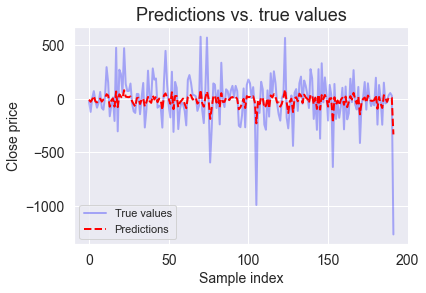

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the XAUUSD data
df = pd.read_csv("XAUUSD_historical_data_30min.csv")

# Sort the data by the "Date" column in ascending order
df = df.sort_values("Date")

# Pre-process the data
scaler = StandardScaler()
X = df[["Open", "High", "Low", "Close"]].values
X = scaler.fit_transform(X)
y = df["Close"].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to tensors
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float().view(-1, 1)

# Define the model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(4, 128)
        self.fc2 = torch.nn.Linear(128, 128)
        self.fc3 = torch.nn.Linear(128, 1)
        self.dropout = torch.nn.Dropout(p=0.5)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Load the model
model = Net()
model.load_state_dict(torch.load("XAUUSD_model_30min.pt"))

# Use the model to make predictions
with torch.no_grad():
    y_pred = model(X_test)

# Convert the predictions to a NumPy array
y_pred = y_pred.numpy()

# Convert the test data to a NumPy array
y_test = y_test.numpy()

# Plot the predictions and the true values
plt.plot(y_test, color='blue', linestyle='solid', linewidth=2, label='True values', alpha=0.3)
plt.plot(y_pred, color='red', linestyle='dashed', linewidth=2, label='Predictions')
plt.xlabel('Sample index')
plt.ylabel('Close price')
plt.title('Predictions vs. true values')
plt.legend()
plt.show()

As you can see from above, it seems to be able to predict the direction the market will be going but not with a lot of accuracy. However, it is able to predict that there will be a giant drop at the end, which proves true.

7 Summary
7.1 Conclusions
Through the exploratory data analysis, we have been able to see that each editor has different priorities as to what and who they discuss within their articles. We can see that there are relationships and trends within the data which make this dataset viable for further exploration.

Within the project, it would be useful to explore sentiment analysis tools to find the most suitable method for long form text, as the current method used is likely not giving us the most useful information.

It is also possible to look into a full machine learning final year project based on this, using web scraping and machine learning model to get the most accurate model to predict the market.

7.2 Summary of prepared data
7.2.1 Articles dataframe:

In [135]:
articles.columns

Index(['URL_ID', 'Publication', 'Author', 'Title', 'Text', 'Text Length',
       'Title Length', 'Filtered text', 'Filtered title', 'Lemmatized text',
       'Lemmatized title', 'Quotes', 'Quotes per 1000 words',
       'Gold density per 1000 words', 'Neg_Sentiment', 'Neu_Sentiment',
       'Pos_Sentiment', 'Comp_Sentiment'],
      dtype='object')

For the articles dataframe:

Filtered and lemmatized text and titles will be used to explore topics and politicians discussed in each article
Text will be used for TF-IDF
Text (unfiltered) can be used for politeness and affectivity metrics
Features will be used for comparative/relational analysis

In [136]:
editors.columns


Index(['Editor', 'Publication', 'Full corpus', 'Title corpus',
       'Filtered corpus', 'Filtered title corpus', 'Lemmatized corpus',
       'Lemmatized title corpus'],
      dtype='object')

For the editors dataframe:

Filtered and lemmatized corpora and title corpora will be used to explore which topics and politicians each editor focuses on most overall
Full corpus (unfiltered) can be used for politeness and affectivity metrics

7 References and Resources
7.1 References

Journalistic Voice: exploring the differences between the writing styles of political editors for four UK news sites


7.2 Resources used
Webscraping
Webscraping lecture and lab, Dr Sean McGrath
P. de Wulf. (2021, Mar. 26). Web Scraping with BeautifulSoup [Online]. Available: https://www.scrapingbee.com/blog/python-web-scraping-beautiful-soup/
Skytowner. (2021, Mar. 18). Beautiful Soup | find_all method [Online]. Available: https://www.skytowner.com/explore/beautiful_soup_find_all_method

Data cleaning and processing, feature generation
Natural Language Processing lab, Dr Sean McGrath
https://www.myfxbook.com/forex-market/currencies/XAUUSD-historical-data
https://stackoverflow.com/questions/15943769/how-do-i-get-the-row-count-of-a-pandas-dataframe
Exploratory data analysis
Natural Language Processing lab, Dr Sean McGrath
K. Fessel. (2020, June 29). Introduction to Seaborn YouTube series [Online]. Available: https://www.youtube.com/playlist?list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j
Matplotlib. Customizing Matplotlib with style sheets and rcParams [Online]. Available: https://matplotlib.org/stable/tutorials/introductory/customizing.html